In [131]:
import pandas as pd
import os 
dirs = os.getcwd() 
files = os.listdir(dirs) 
files

['0ca_after_e.xlsx',
 '0ca_before_e.xlsx',
 '0descriptive 3 eu.pdf',
 '0descriptive 3 eu.xlsx',
 '0gs_after_e.xlsx',
 '0gs_before_e.xlsx',
 '0g_after_e.xlsx',
 '0g_before_e.xlsx',
 '0p_after_e.xlsx',
 '0p_before_e.xlsx',
 '0se_after_e.xlsx',
 '0se_before_e.xlsx',
 '0s_after_e.xlsx',
 '0s_before_e.xlsx',
 '0_all copy 2.ipynb',
 '0_all copy 3.ipynb',
 '0_all copy 4.ipynb',
 '0_all copy.ipynb',
 '0_all.ipynb',
 '0_ca.ipynb',
 '0_goods_service.ipynb',
 '0_service.ipynb',
 'all_data',
 'all_data_total_EU_export_of_Goods_eu_GDP_1.csv',
 'all_data_total_EU_export_of_goods_service_eu_GDP_1.csv',
 'all_data_total_EU_export_of_Service_eu_GDP_1.csv',
 'all_data_total_EU_GDP_CA_1.csv',
 'all_data_total_EU_primary_income_eu_GDP_1.csv',
 'all_data_total_EU_secondary_income_eu_GDP_1.csv',
 'ca.xlsx',
 'ca_after.xlsx',
 'ca_before.xlsx',
 'ca_before_e.xlsx',
 'data',
 'descriptive 2.pdf',
 'descriptive 2.xlsx',
 'descriptive 2_1.pdf',
 'descriptive 3.pdf',
 'descriptive 3.xlsx',
 'descriptive.pdf',
 '

In [132]:
# Sources
# https://matheusfacure.github.io/python-causality-handbook/15-Synthetic-Control.html
# https://nbviewer.jupyter.org/github/OscarEngelbrektson/SyntheticControlMethods/blob/master/examples/user_guide.ipynb

In [133]:
import warnings
import copy
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import os 
from typing import List
from operator import add
from toolz import reduce, partial
from scipy import stats
from scipy.optimize import fmin_slsqp
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge
from matplotlib import style
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm

warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option("display.max_columns", 6)
style.use("fivethirtyeight")

# read data file
# pandas read_csv

dirs = os.getcwd() 
files = os.listdir(dirs) 

data_c = pd.read_csv('all_data_total_EU_GDP_CA_1.csv') 
data_c = data_c.loc[data_c.year >= 2006]
raw_data_c = copy.deepcopy(data_c)# Copy dataframe

data_g = pd.read_csv('all_data_total_EU_export_of_Goods_eu_GDP_1.csv') 
data_g = data_g.loc[data_g.year >= 2006]
raw_data_g = copy.deepcopy(data_g)# Copy dataframe

data_s = pd.read_csv('all_data_total_EU_export_of_Service_eu_GDP_1.csv') 
data_s = data_s.loc[data_s.year >= 2006]
raw_data_s = copy.deepcopy(data_s)# Copy dataframe

data_g_s = pd.read_csv('all_data_total_EU_export_of_goods_service_eu_GDP_1.csv') 
data_g_s = data_g_s.loc[data_g_s.year >= 2006]
raw_data_g_s = copy.deepcopy(data_g_s)# Copy dataframe

data_primary = pd.read_csv('all_data_total_EU_primary_income_eu_GDP_1.csv') 
data_primary = data_primary.loc[data_primary.year >= 2006]
raw_data_primary = copy.deepcopy(data_primary)# Copy dataframe

data_secondary = pd.read_csv('all_data_total_EU_secondary_income_eu_GDP_1.csv') 
data_secondary = data_secondary.loc[data_secondary.year >= 2006]
raw_data_secondary = copy.deepcopy(data_secondary)# Copy dataframe



In [134]:
# EU only

# raw_data_c.describe().loc[raw_data_c.country == 'EU'].to_excel('1ca.xlsx')
# raw_data_c.loc[raw_data_c.year <= 2016].loc[raw_data_c.country == 'EU'].describe().to_excel('1ca_before_e.xlsx')
# raw_data_c.loc[raw_data_c.year >  2016].loc[raw_data_c.country == 'EU'].describe().to_excel('1ca_after_e.xlsx')

# raw_data_g.describe().loc[raw_data_g.country == 'EU'].to_excel('1goods.xlsx')
# raw_data_g.loc[raw_data_g.year <= 2016].loc[raw_data_g.country == 'EU'].describe().to_excel('1g_before_e.xlsx')
# raw_data_g.loc[raw_data_g.year >  2016].loc[raw_data_g.country == 'EU'].describe().to_excel('1g_after_e.xlsx')

# raw_data_s.describe().loc[raw_data_s.country == 'EU'].to_excel('0service.xlsx')
# raw_data_s.loc[raw_data_s.year <= 2016].loc[raw_data_s.country == 'EU'].describe().to_excel('1s_before_e.xlsx')
# raw_data_s.loc[raw_data_s.year >  2016].loc[raw_data_s.country == 'EU'].describe().to_excel('1s_after_e.xlsx')

# raw_data_g_s.describe().loc[raw_data_g_s.country == 'EU'].to_excel('0gs.xlsx')
# raw_data_g_s.loc[raw_data_g_s.year <= 2016].loc[raw_data_g_s.country == 'EU'].describe().to_excel('1gs_before_e.xlsx')
# raw_data_g_s.loc[raw_data_g_s.year >  2016].loc[raw_data_g_s.country == 'EU'].describe().to_excel('1gs_after_e.xlsx')


# raw_data_primary.describe().loc[raw_data_primary.country == 'EU'].to_excel('0primary.xlsx')
# raw_data_primary.loc[raw_data_primary.year <= 2016].loc[raw_data_primary.country == 'EU'].describe().to_excel('1p_before_e.xlsx')
# raw_data_primary.loc[raw_data_primary.year >  2016].loc[raw_data_primary.country == 'EU'].describe().to_excel('1p_after_e.xlsx')

# raw_data_secondary.describe().loc[raw_data_primary.country == 'EU'].to_excel('0secondary.xlsx')
# raw_data_secondary.loc[raw_data_secondary.year <= 2016].loc[raw_data_primary.country == 'EU'].describe().to_excel('1se_before_e.xlsx')
# raw_data_secondary.loc[raw_data_secondary.year >  2016].loc[raw_data_primary.country == 'EU'].describe().to_excel('1se_after_e.xlsx')

In [135]:
display(data_g)

,country,year,Export of goods,...,education,unemployment rate,GDP growth rate
0,Brazil,2006,913,...,9.912729,8.640000,11.042234
1,Brazil,2007,1114,...,9.912729,8.330000,12.918339
2,Brazil,2008,1677,...,9.912729,7.340000,14.265880
3,Brazil,2009,1759,...,9.912729,8.520000,7.168936
4,Brazil,2010,2169,...,8.328785,7.740000,16.647691
...,...,...,...,...,...,...,...
130,EU,2016,142309,...,1.130620,9.150000,2.100000
131,EU,2017,163629,...,1.130620,8.158334,2.800000
132,EU,2018,172968,...,1.130620,7.283333,2.100000
133,EU,2019,170578,...,1.130620,6.716667,1.600000


In [136]:
display(data_s)

,country,year,Export of service,...,education,unemployment rate,GDP growth rate
0,Brazil,2006,582,...,9.912729,8.640000,11.042234
1,Brazil,2007,548,...,9.912729,8.330000,12.918339
2,Brazil,2008,876,...,9.912729,7.340000,14.265880
3,Brazil,2009,811,...,9.912729,8.520000,7.168936
4,Brazil,2010,1109,...,8.328785,7.740000,16.647691
...,...,...,...,...,...,...,...
130,EU,2016,103311,...,1.130620,9.150000,2.100000
131,EU,2017,114367,...,1.130620,8.158334,2.800000
132,EU,2018,125287,...,1.130620,7.283333,2.100000
133,EU,2019,120622,...,1.130620,6.716667,1.600000


In [137]:
display(data_g_s)

,country,year,Total exports of goods and services,...,education,unemployment rate,GDP growth rate
0,Brazil,2006,1495,...,9.912729,8.640000,11.042234
1,Brazil,2007,1662,...,9.912729,8.330000,12.918339
2,Brazil,2008,2553,...,9.912729,7.340000,14.265880
3,Brazil,2009,2570,...,9.912729,8.520000,7.168936
4,Brazil,2010,3278,...,8.328785,7.740000,16.647691
...,...,...,...,...,...,...,...
130,EU,2016,245620,...,1.130620,9.150000,2.100000
131,EU,2017,277996,...,1.130620,8.158334,2.800000
132,EU,2018,298255,...,1.130620,7.283333,2.100000
133,EU,2019,291200,...,1.130620,6.716667,1.600000


In [138]:
display(data_primary)

,country,year,Primary income,...,education,unemployment rate,GDP growth rate
0,Brazil,2006,999,...,9.912729,8.640000,11.042234
1,Brazil,2007,1425,...,9.912729,8.330000,12.918339
2,Brazil,2008,1150,...,9.912729,7.340000,14.265880
3,Brazil,2009,1409,...,9.912729,8.520000,7.168936
4,Brazil,2010,2162,...,8.328785,7.740000,16.647691
...,...,...,...,...,...,...,...
130,EU,2016,55619,...,1.130620,9.150000,2.100000
131,EU,2017,68304,...,1.130620,8.158334,2.800000
132,EU,2018,77832,...,1.130620,7.283333,2.100000
133,EU,2019,77993,...,1.130620,6.716667,1.600000


In [139]:
display(data_secondary)

,country,year,Secondary income,...,education,unemployment rate,GDP growth rate
0,Brazil,2006,999,...,9.912729,8.640000,11.042234
1,Brazil,2007,1425,...,9.912729,8.330000,12.918339
2,Brazil,2008,1150,...,9.912729,7.340000,14.265880
3,Brazil,2009,1409,...,9.912729,8.520000,7.168936
4,Brazil,2010,2162,...,8.328785,7.740000,16.647691
...,...,...,...,...,...,...,...
130,EU,2016,4599,...,1.130620,9.150000,2.100000
131,EU,2017,4597,...,1.130620,8.158334,2.800000
132,EU,2018,4675,...,1.130620,7.283333,2.100000
133,EU,2019,5169,...,1.130620,6.716667,1.600000


In [140]:
# Standardize independent variables
# mean 0 / variance 1

data_c[['inflation','education','unemployment rate','GDP growth rate']] = StandardScaler().fit_transform(data_c[['inflation','education','unemployment rate','GDP growth rate']])

data_g[['inflation','education','unemployment rate','GDP growth rate']] = StandardScaler().fit_transform(data_g [['inflation','education','unemployment rate','GDP growth rate']])

data_g[['inflation','education','unemployment rate','GDP growth rate']] = StandardScaler().fit_transform(data_g_s[['inflation','education','unemployment rate','GDP growth rate']])

data_primary[['inflation','education','unemployment rate','GDP growth rate']] = StandardScaler().fit_transform(data_primary[['inflation','education','unemployment rate','GDP growth rate']])

data_secondary[['inflation','education','unemployment rate','GDP growth rate']] = StandardScaler().fit_transform(data_secondary[['inflation','education','unemployment rate','GDP growth rate']])



In [141]:
def visulaize_origianl(data0, country,interested_variable):
  """
  Make graph with interested variable and country
  This function is to visulize the raw data 
  """

  # Make data0set that is only about entered country 
  str_expr = f"country == '{country}' " 
  data0_new = data0.query(str_expr) 

  plt.figure(figsize=(10,5)) 
  plt.plot(data0['year'],data0[interested_variable],marker="o",alpha=.6, label = f'{interested_variable} with Non {country}',color='dimgray')
  plt.plot(data0_new['year'],data0_new[interested_variable],'R',label = f'{interested_variable} with {country}',color='black')   
  plt.vlines(x=2016,   ymin=-200000, ymax=200000, linestyle=":", lw=2, label="Brexit")
  plt.gray()
  plt.legend();  
  plt.show()


In [142]:
# Country : The country you want to see
# pool: list of country in data set
# main_variable: Variable you want to see. ex) CA
# data0 : data that you have

def agumented_weight_visualize(country, main_variable, data0):
  """
  This function is for showing the weight of countries from ridge ASMC
  """

  #Make new dummy variable 'Brexit'
  data0['Brexit'] = [1 if t else 0 for t in list(data0['year'] > 2016.0)]

  # make data only about selected country
  str_expr = f"country == '{country}' "   
  data0_country = data0.query(str_expr) 

  # .T  flip the table to have one column per state
  features = [main_variable,'unemployment rate', "education",'inflation','GDP growth rate']
  inverted = data0.query("Brexit == 0").pivot(index='country', columns="year")[features].T
  
  # Replace the missing value
  inverted = inverted.fillna(method='pad')
  
  # Set X and y
  y = inverted[country].values
  X = inverted.drop(columns= country).values
  
  # Find the weight of countries in the pool or a given dataset
  weights_ridge = Ridge(fit_intercept=False).fit(X, y).coef_
  weights_ridge_rounded = weights_ridge.round(3)

  # Show weight of countries in the pool
  pool = list(data0['country'].unique())

  dic = {}
  for index in range(len(pool)-1):
    dic[pool[index]] = weights_ridge_rounded[index]
  return dic



In [143]:
# Get X and y

def X_y(country, main_variable, data0):

  features = [ 'inflation',"education",'unemployment rate','GDP growth rate']

  #Make new dummy variable 'Brexit'
  data0['Brexit'] = [1 if t else 0 for t in list(data0['year'] > 2016.0)]

  # make data only about selected country
  str_expr = f"country == '{country}' "   
  data0_country = data0.query(str_expr) 

  # .T  flip the table to have one column per state
  inverted = data0.query("Brexit == 0").pivot(index='country', columns="year")[features].T
  
  # Replace the missing value
  inverted = inverted.fillna(method='pad')
  
  # Set X and y
  y = inverted[country].values
  X = inverted.drop(columns= country).values

  return X,y

In [144]:

def loss_w(W, X, y) -> float:
    return np.sqrt(np.mean((y - X.dot(W))**2))

def get_w(X, y):
    w_start = [1/X.shape[1]]*X.shape[1]

    weights = fmin_slsqp(partial(loss_w, X=X, y=y),
                         np.array(w_start),
                         f_eqcons=lambda x: np.sum(x) - 1,
                         bounds=[(0.0, 1.0)]*len(w_start),
                         disp=False)
    return weights


def sythetic_weight(country, interested_variable, data0):   
  """
  Get the weight of synthetic control.
  """

  data_weights = get_w(X_y(country, interested_variable, data0)[0], X_y(country, interested_variable, data0)[1])
  print("Sum:", data_weights.sum())

  return np.round(data_weights, 4)

def synthetic_plot(country,main_variable, data0):
  """
  Show the plot of synthetic control
  """
  features = [main_variable]
  data_synth_1 = data0.query(f"country != '{country}' ").pivot(index='year', columns="country")[features].values.dot(sythetic_weight(country, 'CA', data0))
  
  plt.figure(figsize=(10,6))
  plt.plot(data0.query(f"country == '{country}'")["year"], data0.query(f"country == '{country}'")[features], label=f"{country}",color='dimgray')
  plt.plot(data0.query(f"country == '{country}'")["year"], data_synth_1, label="Synthetic Control",color='black')
  plt.vlines(x=2016, ymin=-200000, ymax=200000, linestyle=":", lw=2, label="Brexit")
  plt.ylabel(f"{main_variable} ")
  plt.legend();



In [145]:

def synthetic_control(country, main_variable, data0):
  """
  This function is to generate the value of Synthetic Control

  Country : The country you want to see
  pool: list of country in data set
  main_variable: Variable you want to see. ex) CA
  data0 : data that you have
  
  """

  #Make new dummy variable 'Brexit'
  data0['Brexit'] = [1 if t else 0 for t in list(data0['year'] > 2016.0)]

  # make data only about selected country
  str_expr = f"country == '{country}' "   
  data0_country = data0.query(str_expr) 

  # .T  flip the table to have one column per state
  features = [main_variable,'unemployment rate', "education",'inflation','GDP growth rate']
  inverted = data0.query("Brexit == 0").pivot(index='country', columns="year")[features].T
  
  # Replace the missing value
  inverted = inverted.fillna(method='pad')
  
  # Set X and y
  y = inverted[country].values
  X = inverted.drop(columns= country).values
  
  # Find the synthetic controls of countries in the pool or a given dataset
  weights_synth = sythetic_weight(country, main_variable, data0)
  weights_synth.round(3)

  #select countries without country and make tables about main variable entered
  data1 = data0.query(f"country != '{country}' ").pivot(index='year', columns="country")[main_variable]

  # multiply values of main variable with weight that we have gotten
  data_synth_lr = data1.values.dot(weights_synth)

  data0_country['Synthetic'] = data_synth_lr

  return data0_country

def synthetic_control_dataframe(country, main_variable, data0):
 
  """
  This function is to make dataframe that contain the value of Synthetic Control

  Country : The country you want to see
  pool: list of country in data set
  main_variable: Variable you want to see. ex) CA
  data0 : data that you have
  """

  # Deepcopy dataframe
  data1 = copy.deepcopy(data0)

  # Make dataframe that contain values of augmented synthetic control
  data2 = synthetic_control(country, main_variable, data1)

  # Add column of difference
  data2[f'Difference'] = data2[main_variable]- data2['Synthetic']

  # Make dataframe that contain pre-treatment period only
  data_pre = data2.loc[data2.year <= 2016]

  # Make dataframe that contain post-treatment period only
  data_post = data2.loc[data2.year > 2016]

  # Calculate RMSPE for pre-treatment period only
  rmspe = rmse(data_pre[main_variable], data_pre['Synthetic'])
  print('Pre- RMSPE :', rmspe )

  # Calculate RMSPE for post-treatment period only
  rmspe = rmse(data_post[main_variable], data_post['Synthetic'])
  print('Post- RMSPE :', rmspe )

  return data2[['country','year',main_variable,'Synthetic','Difference']]

In [146]:

def agumented_synthetic_control(country, main_variable, data0):
  """
  This function is to make dataframe that contain the value of ASCM

  Country : The country you want to see
  pool: list of country in data set
  main_variable: Variable you want to see. ex) CA
  data0 : data that you have
  
  """

  #Make new dummy variable 'Brexit'
  data0['Brexit'] = [1 if t else 0 for t in list(data0['year'] > 2016.0)]

  # make data only about selected country
  str_expr = f"country == '{country}' "   
  data0_country = data0.query(str_expr) 

  # .T  flip the table to have one column per state
  features = [main_variable,'unemployment rate', "education",'inflation','GDP growth rate']
  inverted = data0.query("Brexit == 0").pivot(index='country', columns="year")[features].T
  
  # Replace the missing value
  inverted = inverted.fillna(method='pad')
  
  # Set X and y
  y = inverted[country].values
  X = inverted.drop(columns= country).values
  
  # Find the weight of countries in the pool or a given dataset
  weights_ridge = Ridge(fit_intercept=False).fit(X, y).coef_
  weights_ridge.round(3)

  #select countries without country and make tables about main variable entered
  data1 = data0.query(f"country != '{country}' ").pivot(index='year', columns="country")[main_variable]

  # multiply values of main variable with weight that we have gotten
  data_synth_lr = data1.values.dot(weights_ridge)

  data0_country['ASCM'] = data_synth_lr

  return data0_country

def rmse(y_true, y_pred):
    '''
    Compute Root Mean Square Percentage Error between two arrays.
    '''
    loss = np.sqrt(np.mean(np.square(((y_true - y_pred) / y_true)), axis=0))

    return loss

def agumented_synthetic_control_dataframe(country, main_variable, data0):

  # Deepcopy dataframe
  data1 = copy.deepcopy(data0)

  # Make dataframe that contain values of augmented synthetic control
  data2 = agumented_synthetic_control(country, main_variable, data1)

  # Add column of difference
  data2['Difference'] = data2[main_variable]- data2['ASCM']

  # Make dataframe that contain pre-treatment period only
  data_pre = data2.loc[data2.year <= 2016]

  # Make dataframe that contain post-treatment period only
  data_post = data2.loc[data2.year > 2016]

  # Calculate RMSPE for pre-treatment period only
  rmspe = rmse(data_pre[main_variable], data_pre['ASCM'])
  print('Pre- RMSPE :', rmspe )

  # Calculate RMSPE for post-treatment period only
  rmspe = rmse(data_post[main_variable], data_post['ASCM'])
  print('Post- RMSPE :', rmspe )

  return data2[['country','year',main_variable,'ASCM','Difference']]

def rmspe_table(main_variable, data0):
  print('*'*300)
  # Deepcopy dataframe
  data1 = copy.deepcopy(data0)
  
  # Make list that contain names of countries
  pool = list(data1['country'].unique())
  
  for each_country in pool:

    # Make dataframe that contain values of augmented synthetic control
    data2 = agumented_synthetic_control(each_country, main_variable, data1)

    # Add column of difference
    data2['Difference'] = data2[main_variable]- data2['ASCM']

    # Make dataframe that contain pre-treatment period only
    data_pre = data2.loc[data2.year <= 2016]

    # Make dataframe that contain post-treatment period only
    data_post = data2.loc[data2.year > 2016]

    print('*'*300)
    print('<',each_country,'>')
    print('')

    # Calculate RMSPE for pre-treatment period only
    rmspe_pre = rmse(data_pre[main_variable], data_pre['ASCM'])
    print(f'Pre- RMSPE :', rmspe_pre )
    print('')
    # Calculate RMSPE for post-treatment period only
    rmspe_post = rmse(data_post[main_variable], data_post['ASCM'])
    print(f'Post- RMSPE :', rmspe_post )
    print('')
    print('Ratio Post_RMSPE/Pre_RMSPE : ',rmspe_post/rmspe_pre )
    print('')
    print('*'*300)


In [147]:
# Country : The country you want to see
# pool: list of country in data set
# main_variable: Variable you want to see. ex) CA
# data0 : data that you have

def agumented_synthetic_control_visualize(country, main_variable, data0):

  
  #Make new dummy variable 'Brexit'
  data0['Brexit'] = [1 if t else 0 for t in list(data0['year'] > 2016.0)]

  # make data only about selected country
  str_expr = f"country == '{country}' "   
  data0_country = data0.query(str_expr) 

  # .T  flip the table to have one column per state
  features = [main_variable,'unemployment rate', "education",'inflation','GDP growth rate']
  inverted = data0.query("Brexit == 0").pivot(index='country', columns="year")[features].T
  
  # Replace the missing value
  inverted = inverted.fillna(method='pad')
  
  # Set X and y
  y = inverted[country].values
  X = inverted.drop(columns= country).values
  
  # Find the weight of countries in the pool or a given dataset/ Calculate the weight through Ridge regression.
  weights_ridge = Ridge(fit_intercept=False).fit(X, y).coef_
  
  # Show weight of countries in the pool
  pool = list(data0['country'].unique())

  #select countries without country and make tables about main variable entered
  data1 = data0.query(f"country != '{country}' ").pivot(index='year', columns="country")[main_variable]

  # multiply values of main variable with weight that we have gotten
  data_synth_lr = data1.values.dot(weights_ridge)

  plt.figure(figsize=(10,6))
  plt.plot(data0.query(f"country == '{country}'")["year"], data0.query(f"country == '{country}'")[main_variable], label=f"{country}",color='dimgray')
  plt.plot(data0.query(f"country == '{country}'")["year"], data_synth_lr, label="Augmented Synthetic Control",color='black')
  plt.vlines(x=2016,  ymin=-200000, ymax=200000, linestyle=":", lw=2, label="Brexit")
  plt.ylabel(f"{main_variable}")
  plt.legend();


In [148]:

def agumented_synthetic_control_visualize_control_test(country, main_variable, data0):
    # print(list(data0['country'].unique())[-1:])
    country_list  = list(data0['country'].unique())
    count = 1
    while len(country_list) > 1 :
        data0 = data0.loc[data0.country.isin(country_list) == True]
        
        #Make new dummy variable 'Brexit'
        print('')
        print(country_list)
        data0['Brexit'] = [1 if t else 0 for t in list(data0['year'] > 2016.0)]

        # make data only about selected country
        str_expr = f"country == '{country}' "   
        data0_country = data0.query(str_expr) 

        # .T  flip the table to have one column per state
        features = [main_variable,'unemployment rate', "education",'inflation','GDP growth rate']
        inverted = data0.query("Brexit == 0").pivot(index='country', columns="year")[features].T
        
        # Replace the missing value
        inverted = inverted.fillna(method='pad')
        
        # Set X and y
        y = inverted[country].values
        X = inverted.drop(columns= country).values
        
        # Find the weight of countries in the pool or a given dataset/ Calculate the weight through Ridge regression.
        weights_ridge = Ridge(fit_intercept=False).fit(X, y).coef_
        print(weights_ridge)
        # Show weight of countries in the pool
        pool = list(data0['country'].unique())

        #select countries without country and make tables about main variable entered
        data1 = data0.query(f"country != '{country}' ").pivot(index='year', columns="country")[main_variable]

        # multiply values of main variable with weight that we have gotten
        data_synth_lr = data1.values.dot(weights_ridge)

        plt.figure(figsize=(10,6))
        plt.plot(data0.query(f"country == '{country}'")["year"], data0.query(f"country == '{country}'")[main_variable], label=f"{country}",color='dimgray')
        plt.plot(data0.query(f"country == '{country}'")["year"], data_synth_lr, label=f"ASCM exclude {count}",color='black')
        plt.vlines(x=2016,  ymin=-200000, ymax=200000, linestyle=":", lw=2, label="Brexit")
        plt.ylabel(f"{main_variable}")
        plt.legend();
        country_list.pop(0)
        count += 1

In [149]:
def placebo_visualize(input_data, interested_country, interested_variable):
  # Make dataframe that contains

  # Make a list of country in a dataset
  pool = list(input_data['country'].unique())
  
  synth_list = []
  for country in pool:
    # Make temporary dataframe that contains synthetic values
    temp_dataframe = agumented_synthetic_control(country, interested_variable, input_data)
    synth_list.append(temp_dataframe)
  
  # Make gahtered data
  data_synth_all= pd.concat(synth_list, axis = 0, sort= False)

  # Make a plot for all country except interested_country
  plt.figure(figsize=(10,6))
  plt.plot(data_synth_all['year'],data_synth_all[f'{interested_variable}']-data_synth_all['ASCM'],marker="o",alpha=.6, label = 'placebo effect',color='dimgray') 
  
  # Make a plot for interested country
  temp_dataframe2 = agumented_synthetic_control(interested_country, interested_variable, input_data)

  plt.plot(temp_dataframe2['year'],temp_dataframe2[f'{interested_variable}']-temp_dataframe2['ASCM'],'R',alpha=.6, label = f'Brexit impact on {interested_country}',color='black')
  plt.vlines(x=2016, ymin=-100000, ymax=200000, linestyle=":", lw=2, label="Brexit")
  plt.ylabel("")
  plt.legend();  
  plt.show()

In [150]:
# Note
# Treatment effect = the value of interested varaible - value of Agumented synthetic control ( The subject here is the interested country)
# Placebo effect = the value of interested varaible - value of Agumented synthetic control ( The subject here is the all the other country except the main country)

# P-value is calculated with following two steps 
# - 1st step : Count the number of placebo effects that have larger absolute values than those of treatment effects.
# - 2nd step : Divide the value from 1st step by the total number of countries 

def Robust_analysis(input_data, interested_country, interested_variable):
  # Make dataframe that contains

  # Make a list of country in a dataset
  pool = list(input_data['country'].unique())
  
  synth_list = []
  for country in pool:
    # Make temporary dataframe that contains synthetic values
    temp_dataframe = agumented_synthetic_control(country, interested_variable, input_data)
    # print(temp_dataframe)
    value_agumented_synthetic_control    = temp_dataframe.iloc[-1,-1]
    value_interested_variable  = temp_dataframe.iloc[-1,2]

    # print(value_interested_variable, value_synthetic_control)
    placebo_effect = value_interested_variable - value_agumented_synthetic_control
    synth_list.append(placebo_effect)
  
  # Calculate synthetic value for interested country in 2020 year
  synth_interested_country = agumented_synthetic_control(interested_country, interested_variable, input_data)

  value_agumented_synthetic_control_main_country = synth_interested_country.iloc[-1,-1]
  value_interested_variable_main_country = synth_interested_country.iloc[-1,2]

  treatment_effect = value_interested_variable_main_country - value_agumented_synthetic_control_main_country

  # Make dictionray to summarise placebo effect
  
  placebo_effect_dictionary = {}
  for now_country, placebo_value in zip(pool[0:-1],synth_list[0:-1]):
    placebo_effect_dictionary[now_country] = placebo_value
  print('Placebo effects:',placebo_effect_dictionary )


  # Make a new list that contains placebo effects which are larger than the treatment effect
  sorted_list= [placebo_effect for placebo_effect in synth_list if abs(placebo_effect) > abs(treatment_effect)]

  p_value = len(sorted_list)/(len(synth_list)-1) # -1: exclude the interested country in the list

  # Print treament effect
  print(f'Brexit Treatment Effect for the Year 2020 ({interested_country}): {treatment_effect}')
  print(f'p-value : {p_value}')

In [151]:
# Note
# Treatment effect = the value of interested varaible - value of Agumented synthetic control ( The subject here is the interested country)
# Placebo effect = the value of interested varaible - value of Agumented synthetic control ( The subject here is the all the other country except the main country)

# P-value is calculated with following two steps 
# - 1st step : Count the number of placebo effects that have larger absolute values than those of treatment effects.
# - 2nd step : Divide the value from 1st step by the total number of countries 

def Robust_analysis_2(input_data, interested_country, interested_variable):
  # Make list that contains sum of absolute placebo effect value
  placebo_all_year = []

  # Make list that contains sum of absolute treatment effect value
  treatment_all_year = []

  # Make a list of country in a dataset
  pool = list(input_data['country'].unique())
  
  # Make list of year in a dataframe
  pool_year = list(input_data['year'].unique())
  current_year = 2016
  

  for year in range(-4,0):# year is -4,-3,-2,-1 . This is to select ASCM from 2016 to 2020
    synth_list = []
    current_year += 1

    for country in pool:
      # Make temporary dataframe that contains synthetic values
      temp_dataframe = agumented_synthetic_control(country, interested_variable, input_data)
      # print(temp_dataframe)
      value_agumented_synthetic_control    = temp_dataframe.iloc[year,-1] # (left: row), (right:column)
      value_interested_variable  = temp_dataframe.iloc[year,2]

      # print(value_interested_variable, value_synthetic_control)
      placebo_effect = value_interested_variable - value_agumented_synthetic_control
      synth_list.append(placebo_effect)


    # Calculate synthetic value for interested country in 2020 year
    synth_interested_country = agumented_synthetic_control(interested_country, interested_variable, input_data)

    value_agumented_synthetic_control_main_country = synth_interested_country.iloc[year,-1]
    value_interested_variable_main_country = synth_interested_country.iloc[year,2]

    treatment_effect = value_interested_variable_main_country - value_agumented_synthetic_control_main_country


    treatment_all_year.append(abs(treatment_effect))
    # Make dictionray to summarise placebo effect
    
    placebo_effect_dictionary = {}
    for now_country, placebo_value in zip(pool[0:-1],synth_list[0:-1]):
      placebo_effect_dictionary[now_country] = placebo_value
    print('Placebo effects:',placebo_effect_dictionary )


    # Make a new list that contains placebo effects which are larger than the treatment effect
    sorted_list= [placebo_effect for placebo_effect in synth_list if abs(placebo_effect) > abs(treatment_effect)]

    p_value = len(sorted_list)/(len(synth_list)-1) # -1: exclude the interested country in the list

    # Print treament effect
    print(f'Brexit Treatment Effect for the Year {current_year} ({interested_country}): {treatment_effect}')
    print(f'p-value : {p_value}')
    print('')
    print('')

In [152]:
agumented_weight_visualize('EU'	, 'Primary income', data_primary)

{'Brazil': -11.729,
 'Canada': 9.409,
 'China': 2.06,
 'India': 3.988,
 'Japan': -9.983,
 'Russia': 9.62,
 'Switzerland': -0.106,
 'USA': 2.342}

In [153]:
sythetic_weight('EU'	, 'CA', data_c)

Sum: 1.0000000000000002


array([0.    , 0.9873, 0.    , 0.    , 0.    , 0.    , 0.    , 0.0127])

In [154]:
agumented_synthetic_control_dataframe('EU'	, 'CA', data_c)

Pre- RMSPE : 0.09143213457138007
Post- RMSPE : 0.8786797869251954


,country,year,CA,ASCM,Difference
120,EU,2006,-41134,-35015.539107,-6118.460893
121,EU,2007,-57047,-56858.649102,-188.350898
122,EU,2008,-37986,-41903.152109,3917.152109
123,EU,2009,-48781,-52989.508633,4208.508633
124,EU,2010,-58028,-50700.022361,-7327.977639
125,EU,2011,-52600,-61782.457199,9182.457199
126,EU,2012,-81354,-75954.920908,-5399.079092
127,EU,2013,-97270,-99664.934553,2394.934553
128,EU,2014,-109969,-109641.252569,-327.747431
129,EU,2015,-111525,-109653.322074,-1871.677926


In [155]:
synthetic_control_dataframe('EU', 'CA', data_c)

Sum: 1.0000000000000002
Pre- RMSPE : 1.1915079961260686
Post- RMSPE : 1.1537081779227192


,country,year,CA,Synthetic,Difference
120,EU,2006,-41134,11041.7720,-52175.7720
121,EU,2007,-57047,11570.5873,-68617.5873
122,EU,2008,-37986,12643.1383,-50629.1383
123,EU,2009,-48781,9438.9017,-58219.9017
124,EU,2010,-58028,11329.2928,-69357.2928
125,EU,2011,-52600,12672.6492,-65272.6492
126,EU,2012,-81354,12208.6652,-93562.6652
127,EU,2013,-97270,14371.2140,-111641.2140
128,EU,2014,-109969,12622.2057,-122591.2057
129,EU,2015,-111525,12826.8018,-124351.8018


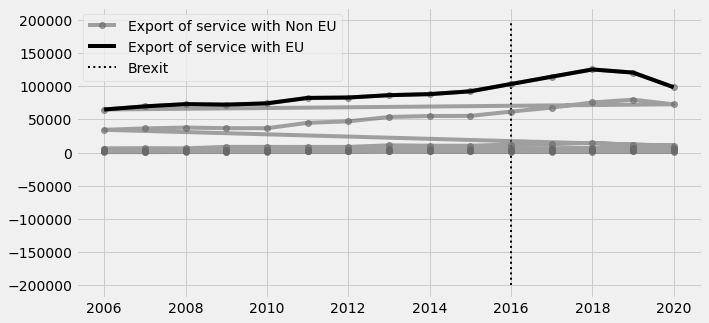

In [156]:
visulaize_origianl(data_s,'EU'	, 'Export of service')

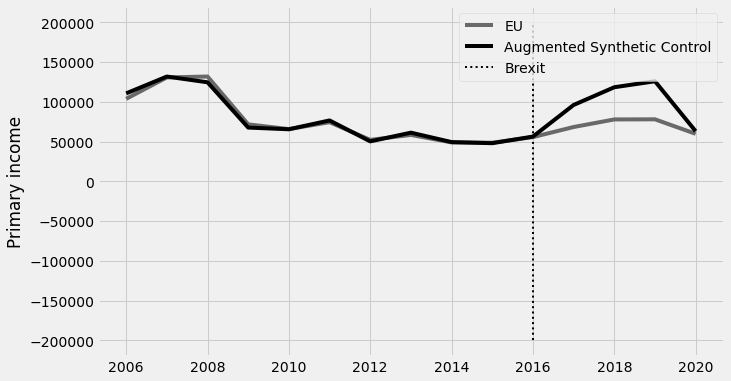

In [157]:
agumented_synthetic_control_visualize('EU'	, 'Primary income', data_primary)

Sum: 1.0000000000000002


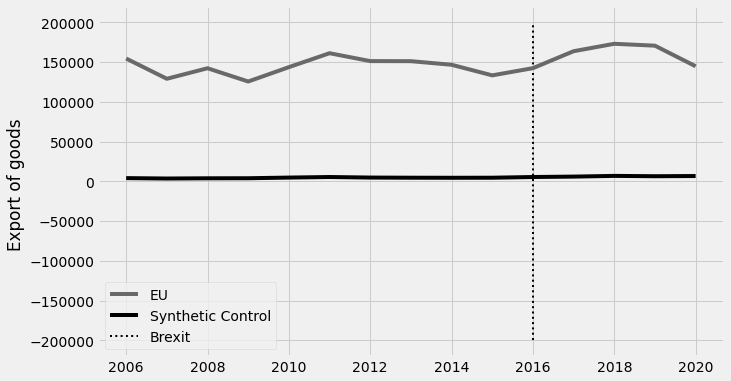

In [176]:
synthetic_plot('EU'	, 'Export of goods', data_g)

Sum: 1.0000000000000047


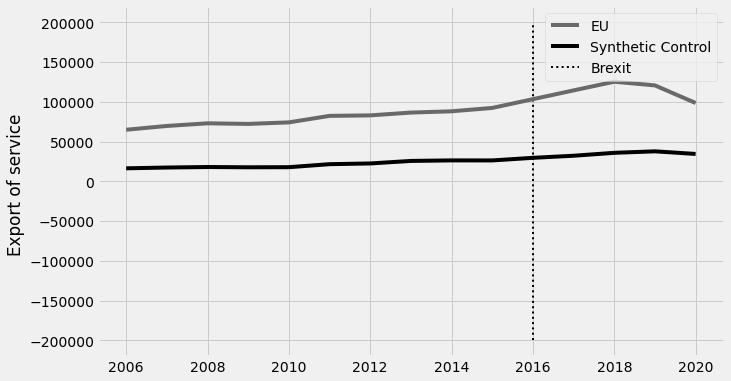

In [158]:
synthetic_plot('EU'	, 'Export of service', data_s)

Sum: 1.0000000000000047


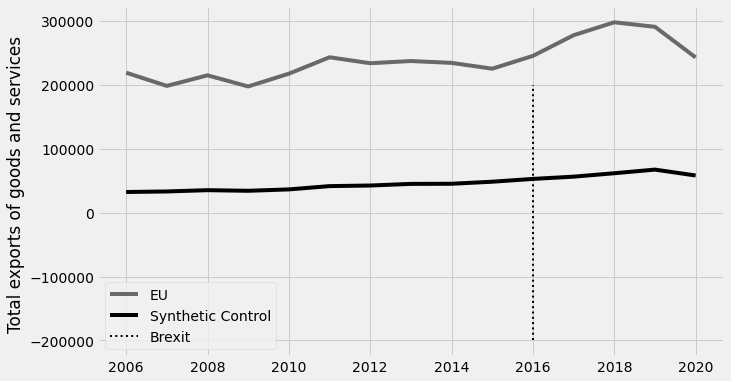

In [172]:
synthetic_plot('EU'	, 'Total exports of goods and services', data_g_s)

Sum: 1.0000000000000002


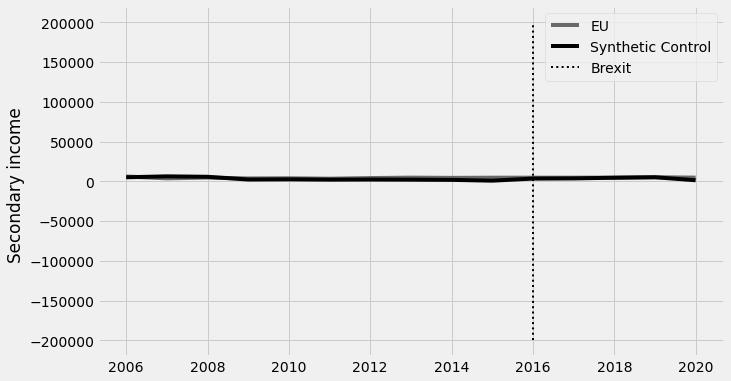

In [175]:
synthetic_plot('EU'	, 'Secondary income', data_secondary)

Sum: 1.0000000000000002


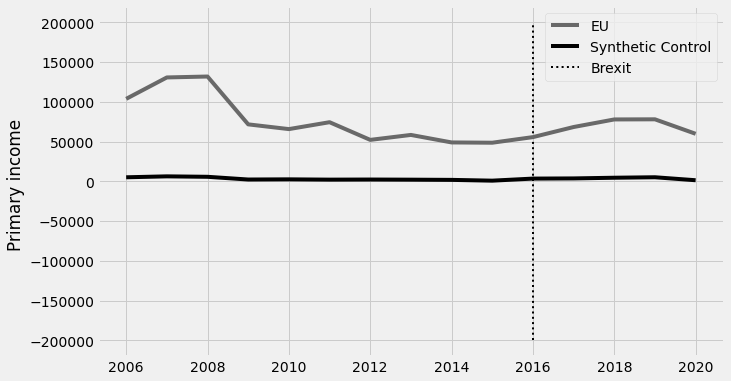

In [174]:
synthetic_plot('EU'	, 'Primary income', data_primary)

Sum: 1.0000000000000002


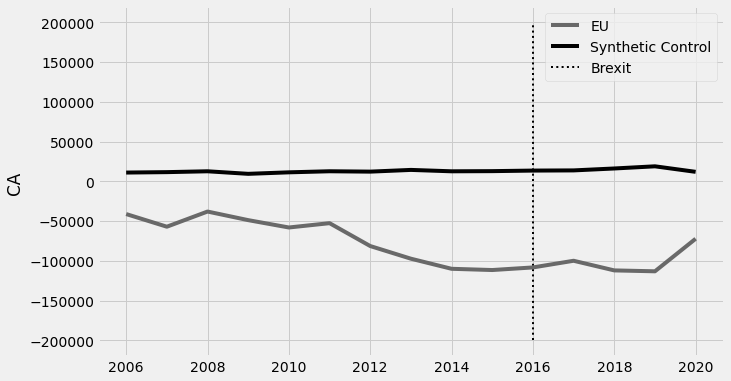

In [170]:
synthetic_plot('EU'	, 'CA', data_c)

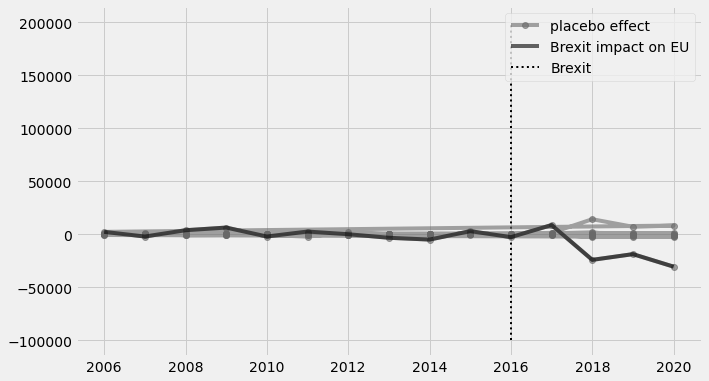

In [159]:
placebo_visualize(data_s, 'EU'	, 'Export of service')

In [160]:
 Robust_analysis(data_s, 'EU'	, 'Export of service')

Placebo effects: {'Brazil': -896.8298008484933, 'Canada': 412.50011365105456, 'China': -629.6109243096898, 'India': 1071.422732653105, 'Japan': -1402.5208733888176, 'Russia': -1123.2463767990507, 'Switzerland': -2394.6184705746364, 'USA': 8289.894763473174}
Brexit Treatment Effect for the Year 2020 (EU): -30464.39712492164
p-value : 0.0


In [162]:
rmspe_table( 'Secondary income', data_secondary)

************************************************************************************************************************************************************************************************************************************************************************************************************
************************************************************************************************************************************************************************************************************************************************************************************************************
< Brazil >

Pre- RMSPE : 0.18652068955263434

Post- RMSPE : 1.3429077856034342

Ratio Post_RMSPE/Pre_RMSPE :  7.199779224623113

*****************************************************************************************************************************************************************************************************************************************************************************

In [161]:
 Robust_analysis_2(data_s, 'EU'	, 'Export of service')

Placebo effects: {'Brazil': 145.4860424674016, 'Canada': -362.5640500929203, 'China': 49.41484877507628, 'India': -312.40564927083005, 'Japan': -45.92522546904911, 'Russia': 55.89486588559794, 'Switzerland': 954.8912279646011, 'USA': 1449.868163915773}
Brexit Treatment Effect for the Year 2017 (EU): 8787.495504509527
p-value : 0.0


Placebo effects: {'Brazil': 191.60259781822538, 'Canada': -607.5402550261178, 'China': -1767.9054521296284, 'India': 1392.5350620118506, 'Japan': -2643.899868816825, 'Russia': -1571.7812182747234, 'Switzerland': 1936.7345777062146, 'USA': 14282.768506109642}
Brexit Treatment Effect for the Year 2018 (EU): -24051.875370635535
p-value : 0.0


Placebo effects: {'Brazil': -897.5483694486798, 'Canada': 202.06410141911965, 'China': -297.3264795047453, 'India': 988.8831192975208, 'Japan': -1658.453624718817, 'Russia': -1021.2201848682143, 'Switzerland': -2119.1588125322032, 'USA': 7138.414759575142}
Brexit Treatment Effect for the Year 2019 (EU): -18651.9486500673


['Brazil', 'Canada', 'China', 'India', 'Japan', 'Russia', 'Switzerland', 'USA', 'EU']
[ 25.67522707  12.67622579  -1.84132778 -10.04537644   6.07869015
  -7.34290678  -1.16131589  -1.64635586]

['Canada', 'China', 'India', 'Japan', 'Russia', 'Switzerland', 'USA', 'EU']
[12.96135524 -1.840265   -3.91510323  8.44974577 -7.95732341  0.9623391
 -2.38361466]

['China', 'India', 'Japan', 'Russia', 'Switzerland', 'USA', 'EU']
[-2.04122198  0.34876032  6.63310157 -4.10779583  0.33491518 -1.22535161]

['India', 'Japan', 'Russia', 'Switzerland', 'USA', 'EU']
[-5.11795672  7.20904093 -1.24017469  0.21459579 -1.60033989]

['Japan', 'Russia', 'Switzerland', 'USA', 'EU']
[ 6.09671687 -1.97323342  4.86741574 -2.6372971 ]

['Russia', 'Switzerland', 'USA', 'EU']
[ 2.72491778  8.11987492 -2.31635848]

['Switzerland', 'USA', 'EU']
[ 9.21223471 -2.28725351]

['USA', 'EU']
[-0.70243115]


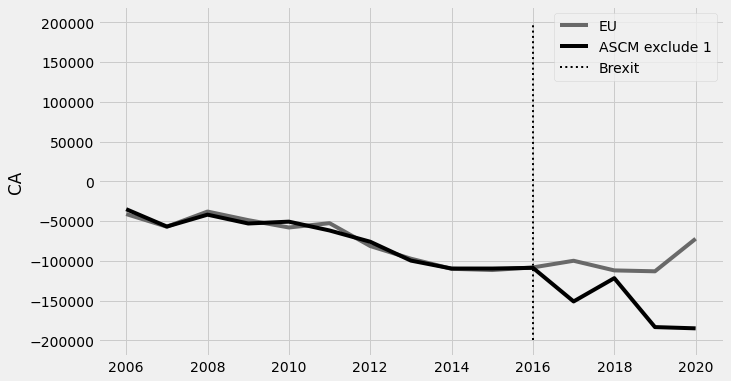

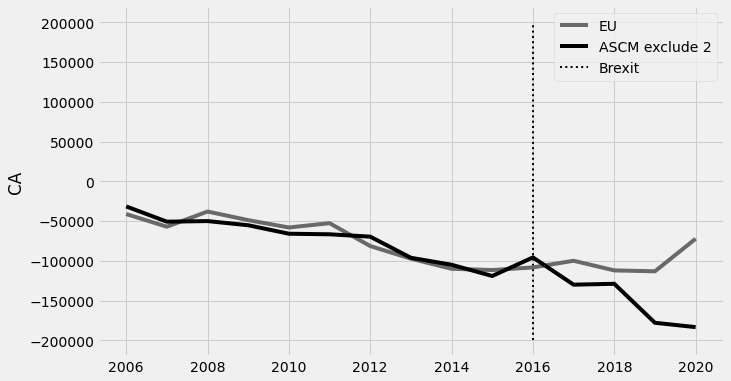

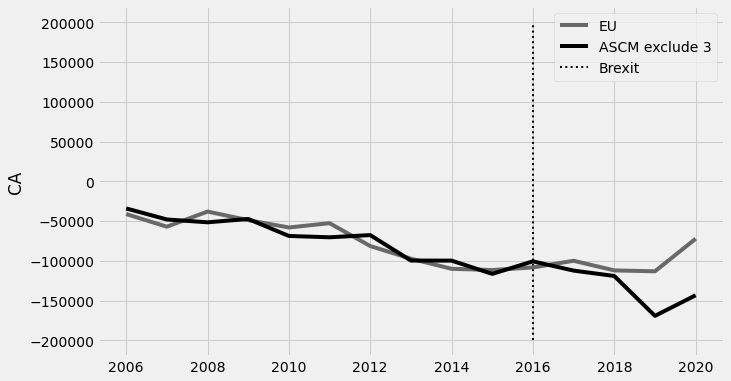

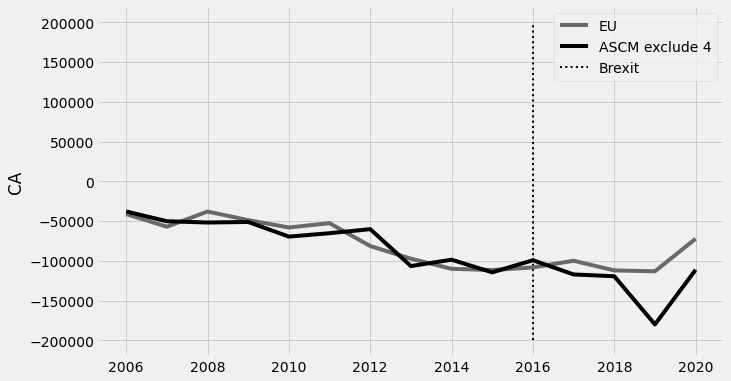

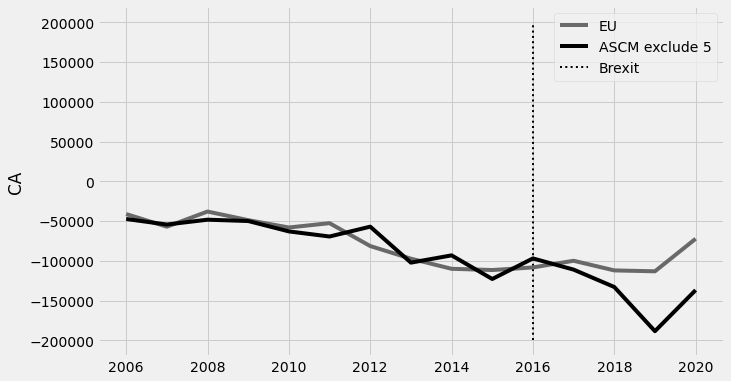

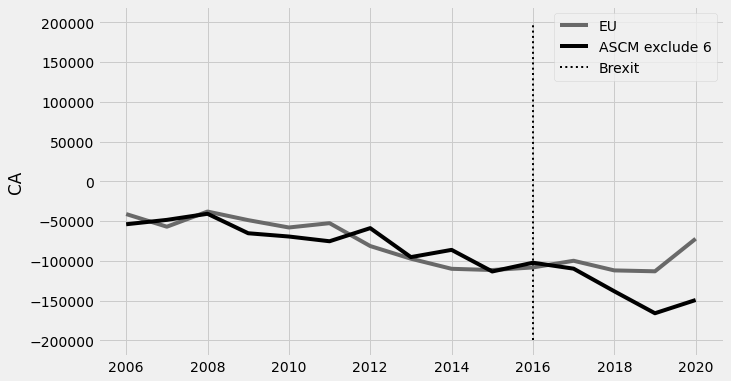

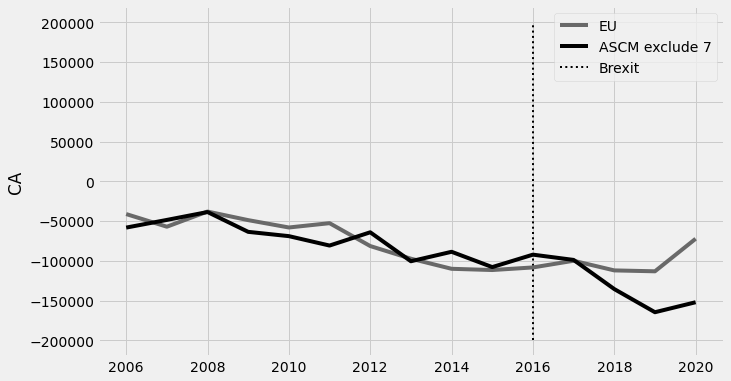

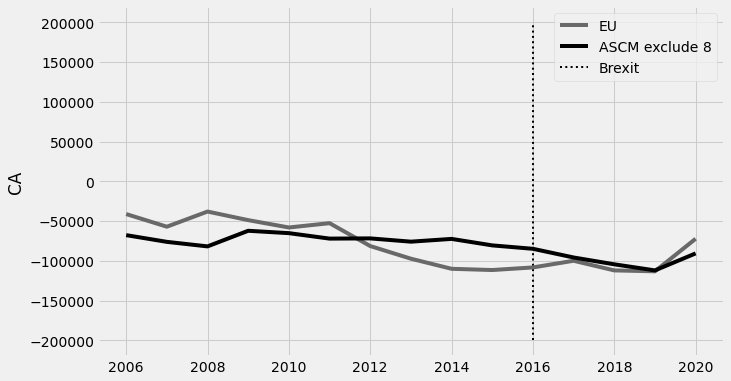

In [163]:
agumented_synthetic_control_visualize_control_test('EU'	, 'CA', data_c)


['Brazil', 'Canada', 'China', 'India', 'Japan', 'Russia', 'Switzerland', 'USA', 'EU']
[ 11.79647709   9.59436572  -5.14982878  11.93900345   7.90036441
 -15.24692379 -10.66340435   3.07656521]

['Canada', 'China', 'India', 'Japan', 'Russia', 'Switzerland', 'USA', 'EU']
[ 9.58524343 -4.84241995  9.97714734  9.11146173 -3.16274987 -4.52440915
  1.73188033]

['China', 'India', 'Japan', 'Russia', 'Switzerland', 'USA', 'EU']
[-6.44113753  8.51869166 12.54566857  5.94454522  1.34293815  1.07251531]

['India', 'Japan', 'Russia', 'Switzerland', 'USA', 'EU']
[ 13.17743993   7.64303769 -13.14434099 -14.91080468   4.14061965]

['Japan', 'Russia', 'Switzerland', 'USA', 'EU']
[ 12.91656215   4.2052452  -10.54204586   2.79769714]

['Russia', 'Switzerland', 'USA', 'EU']
[  1.95983876 -13.90231655   4.82213751]

['Switzerland', 'USA', 'EU']
[-14.96160782   5.12098261]

['USA', 'EU']
[2.62662062]


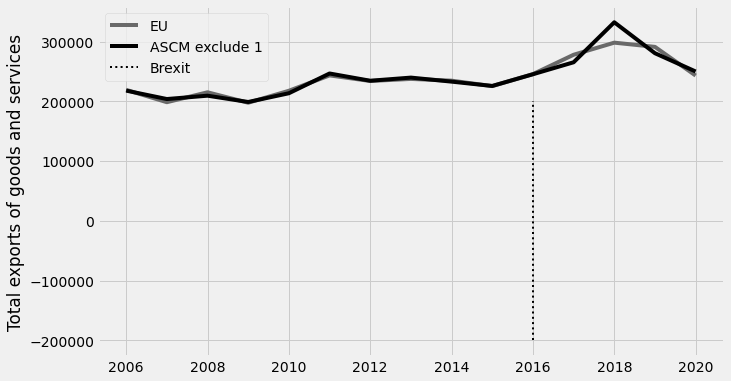

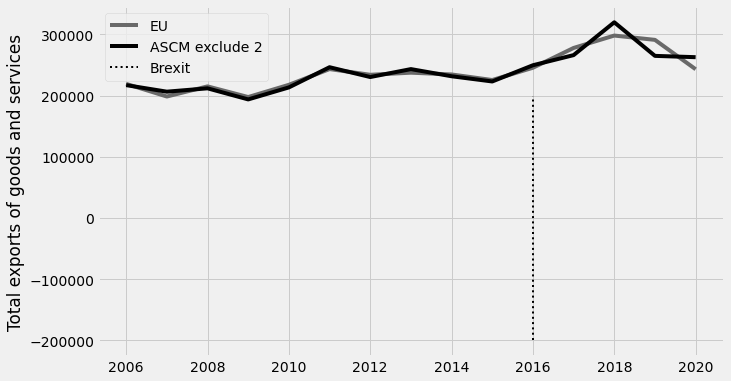

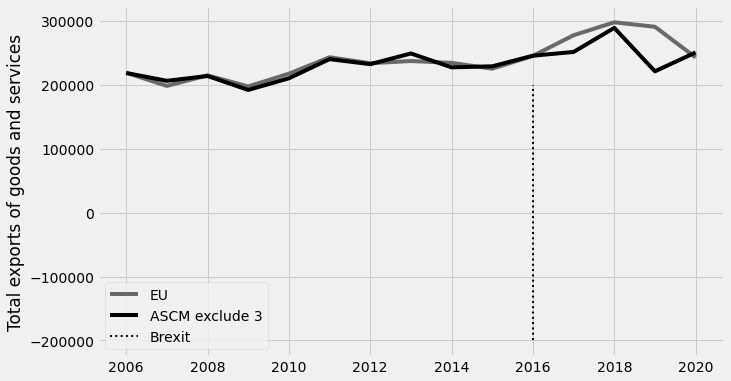

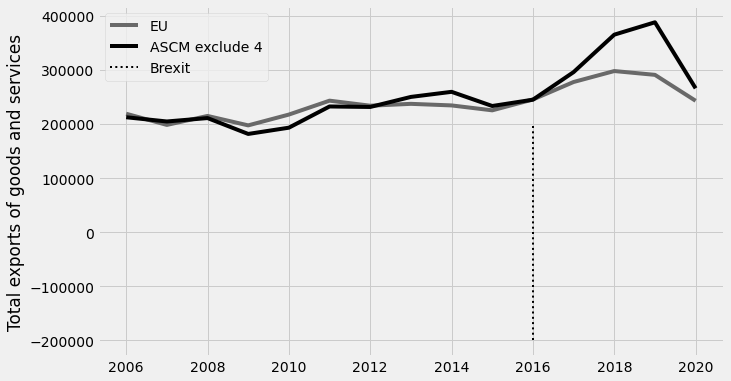

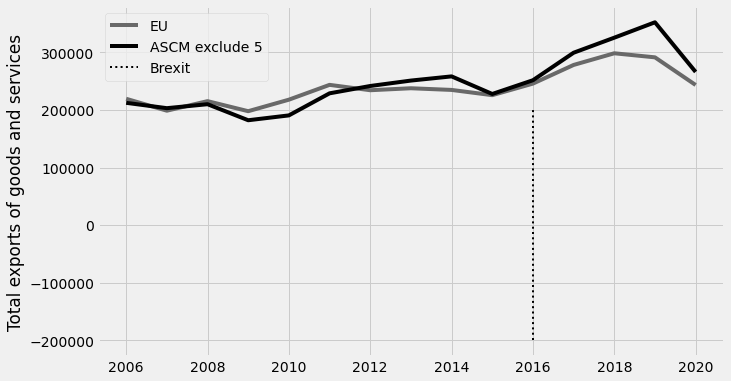

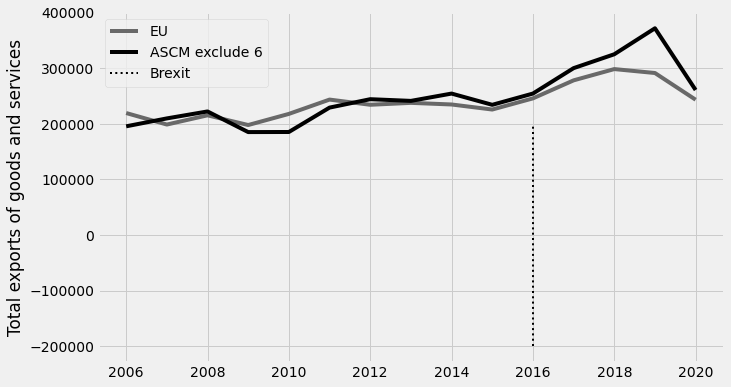

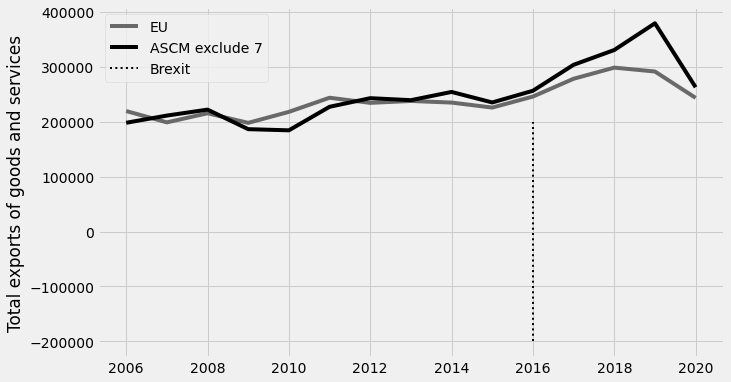

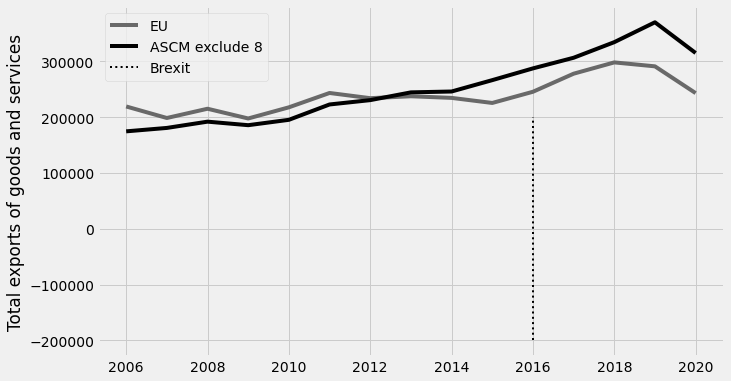

In [169]:
agumented_synthetic_control_visualize_control_test('EU'	, 'Total exports of goods and services', data_g_s)